In [ ]:
#Para el tratamiento de los datos
import pandas as pd  # Pandas se utiliza para manipulación y análisis de datos, especialmente con estructuras como DataFrames.
from datetime import datetime  # Datetime se usa para trabajar con fechas y horas.

#Para la creación y manejo de bases de datos (PostgreSQL)
import psycopg2  # Psycopg2 es una librería para interactuar con bases de datos PostgreSQL.
from psycopg2 import OperationalError, errorcodes, errors  # Excepciones comunes en psycopg2 para manejo de errores en conexiones.

#Para la visualización
import matplotlib.pyplot as plt  # Matplotlib se usa para crear gráficos y visualizaciones.
import matplotlib_inline  # Matplotlib_inline permite mostrar gráficos de Matplotlib en entornos interactivos.
import seaborn as sns  # Seaborn es una biblioteca de visualización de datos basada en Matplotlib.

#Para utilizar funciones propias
import sys  # Sys permite manipular el entorno de ejecución, como modificar rutas de búsqueda de módulos.
import os  # Os proporciona funciones para interactuar con el sistema operativo, como gestionar rutas de archivos.
sys.path.append(os.path.abspath("../src"))  # Agrega el directorio "../src" al PATH para importar módulos personalizados.
import funciones as f

Ahora conecto con mi base de datos para empezar a crear allí las tablas con los datos

In [2]:
try:
    conexion= psycopg2.connect(
        database= "Precios_productos_basicos",
        user= "postgres",
        password= "admin",
        host= "localhost",
        port= "5432"
    )
except OperationalError as e:
    if e.pgcode == errorcodes.INVALID_PASSWORD:
        print("La contraseña es erronea")
    elif e.pgcode == errorcodes.CONNECTION_EXCEPTION:
        print("Error de conexion")
    else:
        print(f"Ocurrió el error {e}")

QUERIES PARA VISUALIZACION

COMPARACION MAXIMO Y MINIMO EN LOS SUPERS POR PRODUCTO HOY
(En realidad no es hoy sino el 2024/10/26 porque la extracción tarda tanto que no merece la pena tener que extraer todos los días los datos)

In [3]:
cursor=conexion.cursor()
query_comparacion_max_min_leche="""
SELECT m.super ,p2.producto, p.precio
FROM mercados m
INNER JOIN principal p ON m.id_super = p.id_super
INNER JOIN productos p2 ON p.id_producto = p2.id_producto 
WHERE (fecha = '2024/10/26' AND p2.producto = 'leche') ;
"""
cursor.execute(query_comparacion_max_min_leche)
df_comparacion_max_min_leche= pd.DataFrame(cursor.fetchall())

In [4]:
df_comparacion_max_min_leche.head()

,0,1,2
0,carrefour,leche,5.60
1,carrefour,leche,2.30
2,carrefour,leche,1.39
3,carrefour,leche,1.88
4,carrefour,leche,1.09


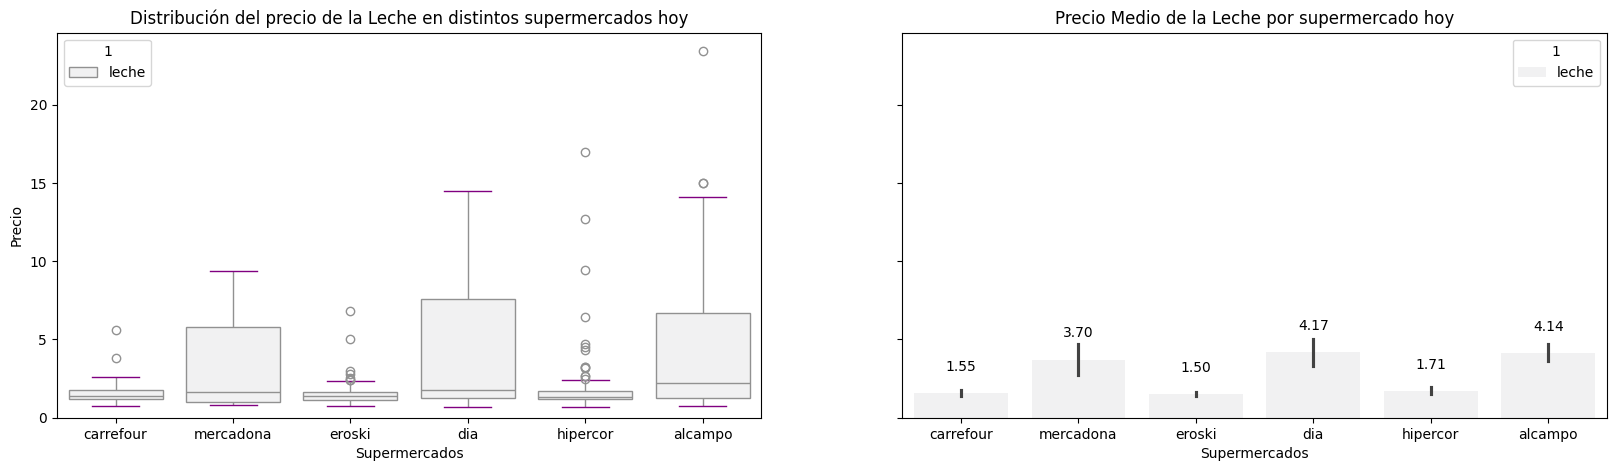

In [5]:
f.datos_grafico_comparacion_max_min(0,2,1,df_comparacion_max_min_leche,"light:blue","Leche",14)

In [6]:
cursor=conexion.cursor()
query_comparacion_max_min_oliva="""
SELECT m.super ,p2.producto, p.precio
FROM mercados m
INNER JOIN principal p ON m.id_super = p.id_super
INNER JOIN productos p2 ON p.id_producto = p2.id_producto 
WHERE (fecha = '2024/10/26' AND p2.producto = 'aceite-de-oliva') ;
"""
cursor.execute(query_comparacion_max_min_oliva)
df_comparacion_max_min_oliva= pd.DataFrame(cursor.fetchall())

In [7]:
df_comparacion_max_min_oliva.head()

,0,1,2
0,carrefour,aceite-de-oliva,9.48
1,carrefour,aceite-de-oliva,9.07
2,carrefour,aceite-de-oliva,51.20
3,carrefour,aceite-de-oliva,10.69
4,carrefour,aceite-de-oliva,11.21


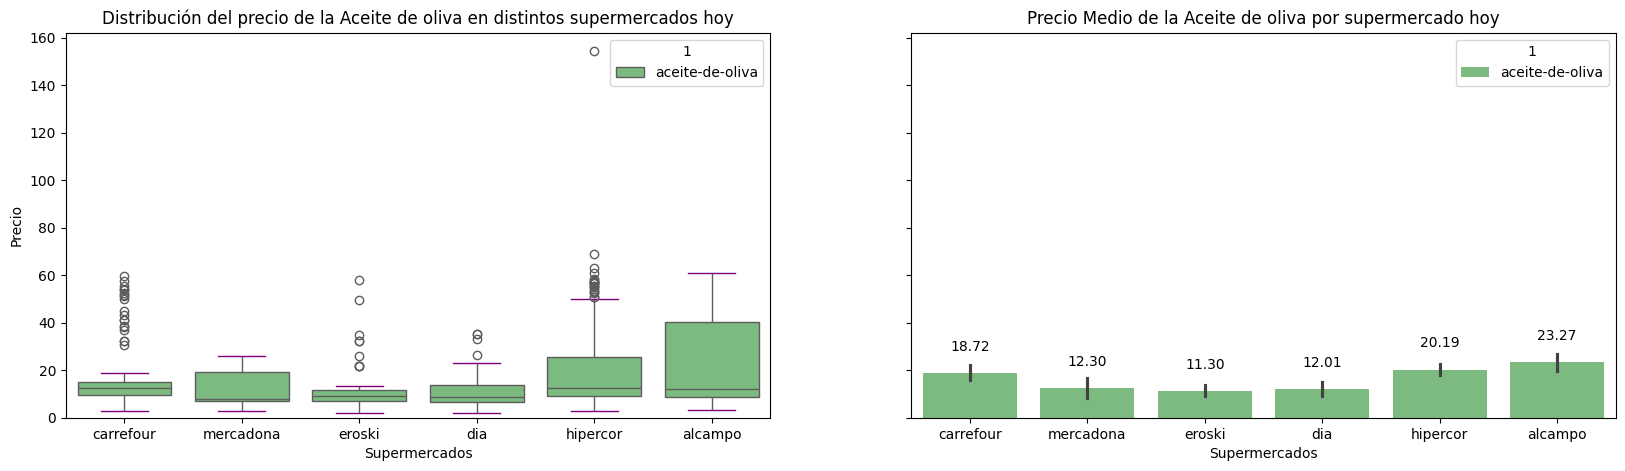

In [8]:
f.datos_grafico_comparacion_max_min(0,2,1,df_comparacion_max_min_oliva,"Greens","Aceite de oliva",14)

In [9]:
cursor=conexion.cursor()
query_comparacion_max_min_girasol="""
SELECT m.super ,p2.producto, p.precio
FROM mercados m
INNER JOIN principal p ON m.id_super = p.id_super
INNER JOIN productos p2 ON p.id_producto = p2.id_producto 
WHERE (fecha = '2024/10/26' AND p2.producto = 'aceite-de-girasol') ;
"""
cursor.execute(query_comparacion_max_min_girasol)
df_comparacion_max_min_girasol= pd.DataFrame(cursor.fetchall())

In [10]:
df_comparacion_max_min_girasol.head()

,0,1,2
0,carrefour,aceite-de-girasol,21.90
1,carrefour,aceite-de-girasol,1.48
2,carrefour,aceite-de-girasol,10.55
3,carrefour,aceite-de-girasol,2.35
4,carrefour,aceite-de-girasol,12.65


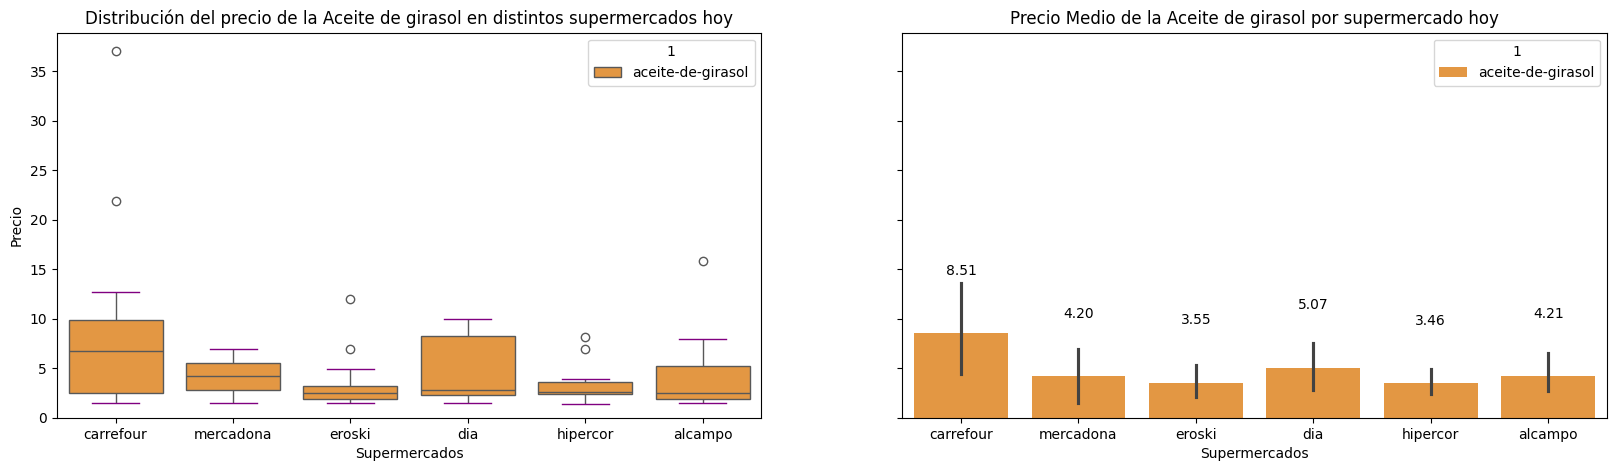

In [11]:
f.datos_grafico_comparacion_max_min(0,2,1,df_comparacion_max_min_girasol,"YlOrBr","Aceite de girasol",40)

Análisis de la Evolución de Precios: Estudiar cómo han cambiado los precios de los productos a lo largo del tiempo en distintos supermercados.

In [12]:
cursor=conexion.cursor()
query_evol_leche="""
SELECT p.fecha, m.super, p2.producto, AVG(p.variacion) OVER (PARTITION BY m.super, p2.producto ORDER BY p.fecha) AS VariacionAcumulada
FROM mercados m
INNER JOIN principal p ON m.id_super = p.id_super
INNER JOIN productos p2 ON p.id_producto = p2.id_producto
WHERE p2.producto = 'leche'
ORDER BY p2.producto, m.super, p.fecha;
"""
cursor.execute(query_evol_leche)
df_evolucion_variacion_leche= pd.DataFrame(cursor.fetchall())

In [13]:
df_evolucion_variacion_leche[0] = pd.to_datetime(df_evolucion_variacion_leche[0])

In [14]:
df_evolucion_variacion_leche.head(2)

,0,1,2,3
0,2024-07-15,alcampo,leche,0.0
1,2024-07-15,alcampo,leche,0.0


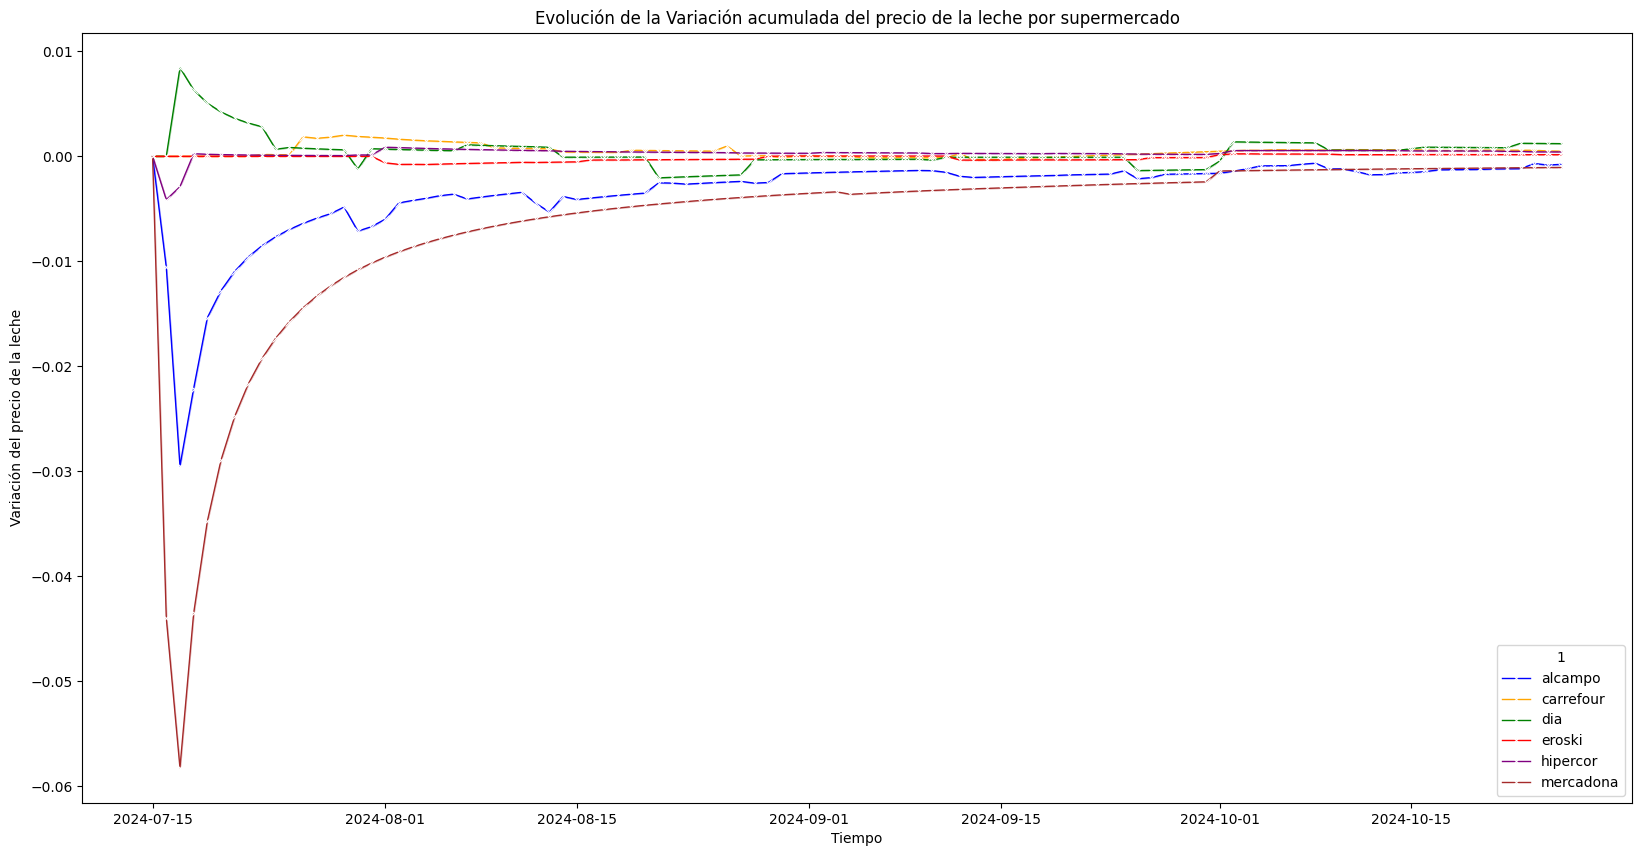

In [15]:
f.grafico_evolucion_variacion_acumulada(0,3,1,df_evolucion_variacion_leche,"leche")

In [16]:
cursor=conexion.cursor()
query_evol_girasol="""
SELECT p.fecha, m.super, p2.producto, AVG(p.variacion) OVER (PARTITION BY m.super, p2.producto ORDER BY p.fecha) AS VariacionAcumulada
FROM mercados m
INNER JOIN principal p ON m.id_super = p.id_super
INNER JOIN productos p2 ON p.id_producto = p2.id_producto
WHERE p2.producto = 'aceite-de-girasol'
ORDER BY p2.producto, m.super, p.fecha;
"""
cursor.execute(query_evol_girasol)
df_evolucion_variacion_girasol= pd.DataFrame(cursor.fetchall())

In [17]:
df_evolucion_variacion_girasol[0] = pd.to_datetime(df_evolucion_variacion_girasol[0])

In [18]:
df_evolucion_variacion_girasol.head(2)

,0,1,2,3
0,2024-06-22,alcampo,aceite-de-girasol,0.0
1,2024-06-23,alcampo,aceite-de-girasol,0.0


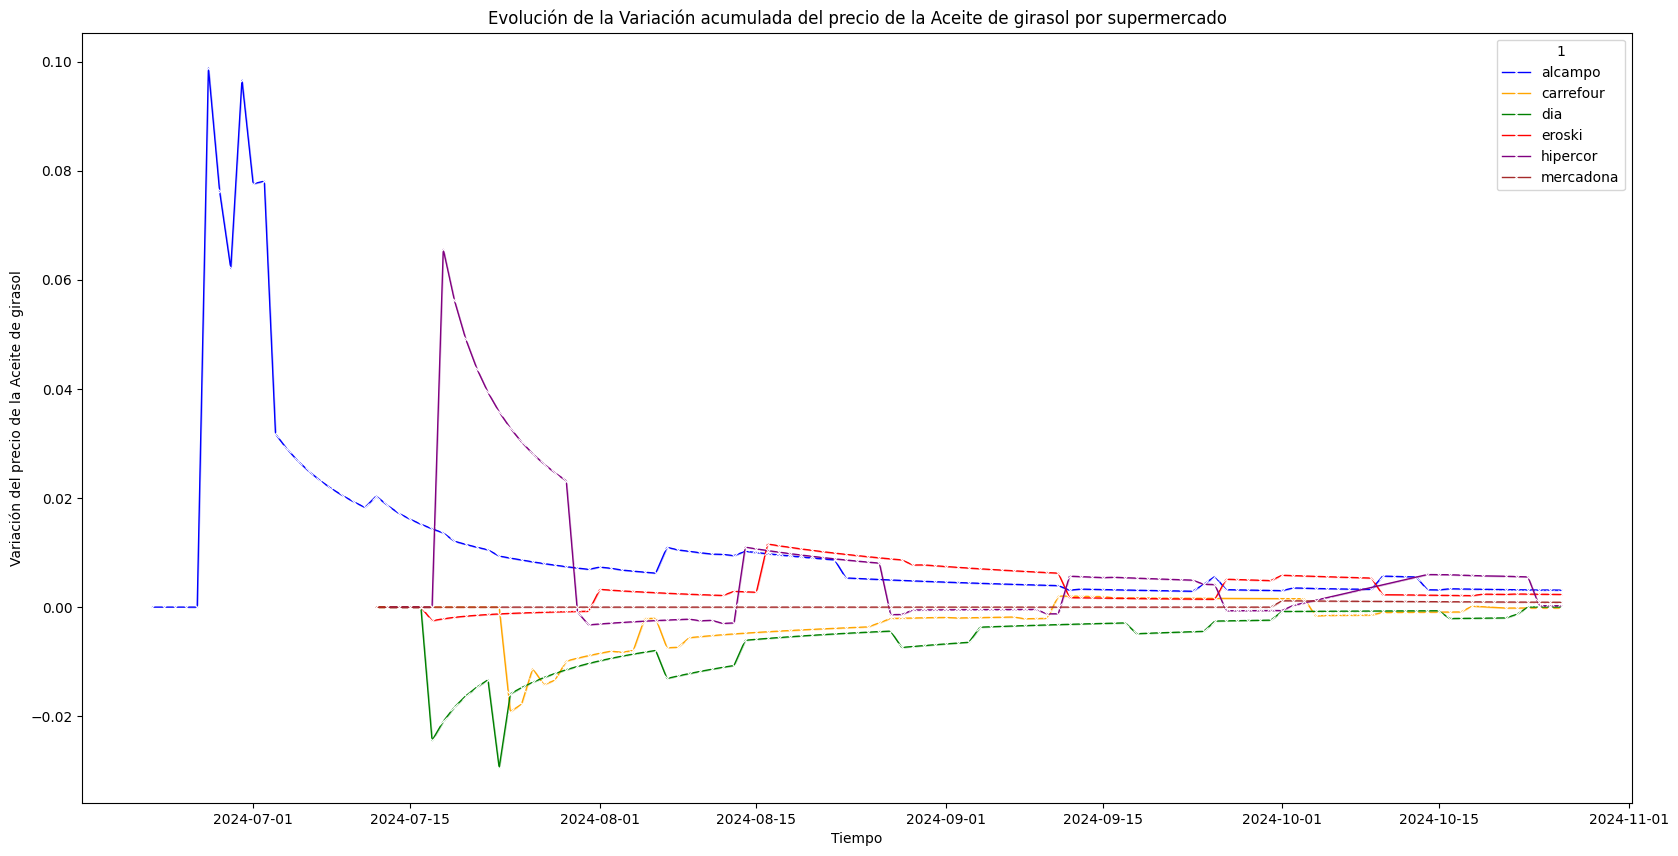

In [19]:
f.grafico_evolucion_variacion_acumulada(0,3,1,df_evolucion_variacion_girasol,"Aceite de girasol")

In [20]:
cursor=conexion.cursor()
query_evol_oliva="""
SELECT p.fecha, m.super, p2.producto, AVG(p.variacion) OVER (PARTITION BY m.super, p2.producto ORDER BY p.fecha) AS VariacionAcumulada
FROM mercados m
INNER JOIN principal p ON m.id_super = p.id_super
INNER JOIN productos p2 ON p.id_producto = p2.id_producto
WHERE p2.producto = 'aceite-de-oliva'
ORDER BY p2.producto, m.super, p.fecha;
"""
cursor.execute(query_evol_oliva)
df_evolucion_variacion_oliva= pd.DataFrame(cursor.fetchall())

In [21]:
df_evolucion_variacion_oliva[0] = pd.to_datetime(df_evolucion_variacion_oliva[0])

In [22]:
df_evolucion_variacion_oliva.head(2)

,0,1,2,3
0,2024-06-22,alcampo,aceite-de-oliva,0.0
1,2024-06-22,alcampo,aceite-de-oliva,0.0


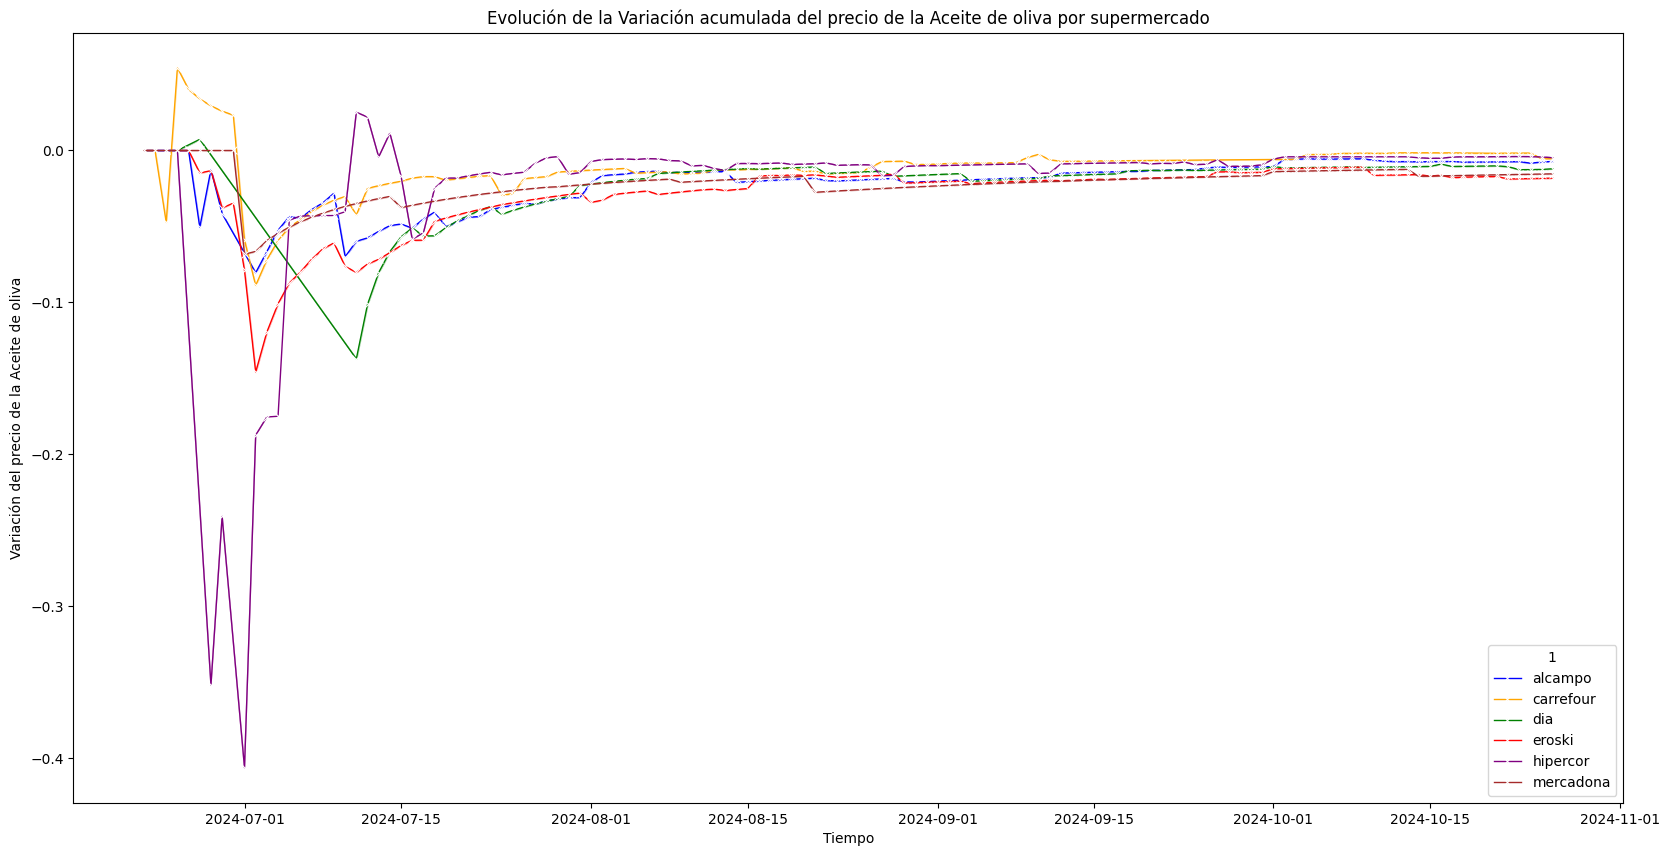

In [23]:
f.grafico_evolucion_variacion_acumulada(0,3,1,df_evolucion_variacion_oliva,"Aceite de oliva")

ANOMALIAS

ESTOS MUESTRAN la media de las variaciones (osea como aumenta o disminuye el precio de cada articulo de la categoria Leche (Es decir elimina el sesgo del número de variantes que ofrece cada supermercado)) Su limitación es que hemos visto que la media no es un buen indicador porque disocia demasiado de la mediana sobre todo en los aceites con lo que no sé si usar los graficos con la media o con la suma 

In [24]:
cursor=conexion.cursor()
query_anomalias_variacion_leche="""
SELECT fecha, super, p2.producto, AVG(p.variacion)  
FROM mercados m 
INNER JOIN principal p ON m.id_super = p.id_super
INNER JOIN productos p2 ON p.id_producto = p2.id_producto 
WHERE p2.producto = 'leche'
GROUP BY fecha, super, p2.producto; 
"""
cursor.execute(query_anomalias_variacion_leche)
df_anomalias_variacion_leche= pd.DataFrame(cursor.fetchall())


In [25]:
df_anomalias_variacion_leche[0] = pd.to_datetime(df_anomalias_variacion_leche[0])

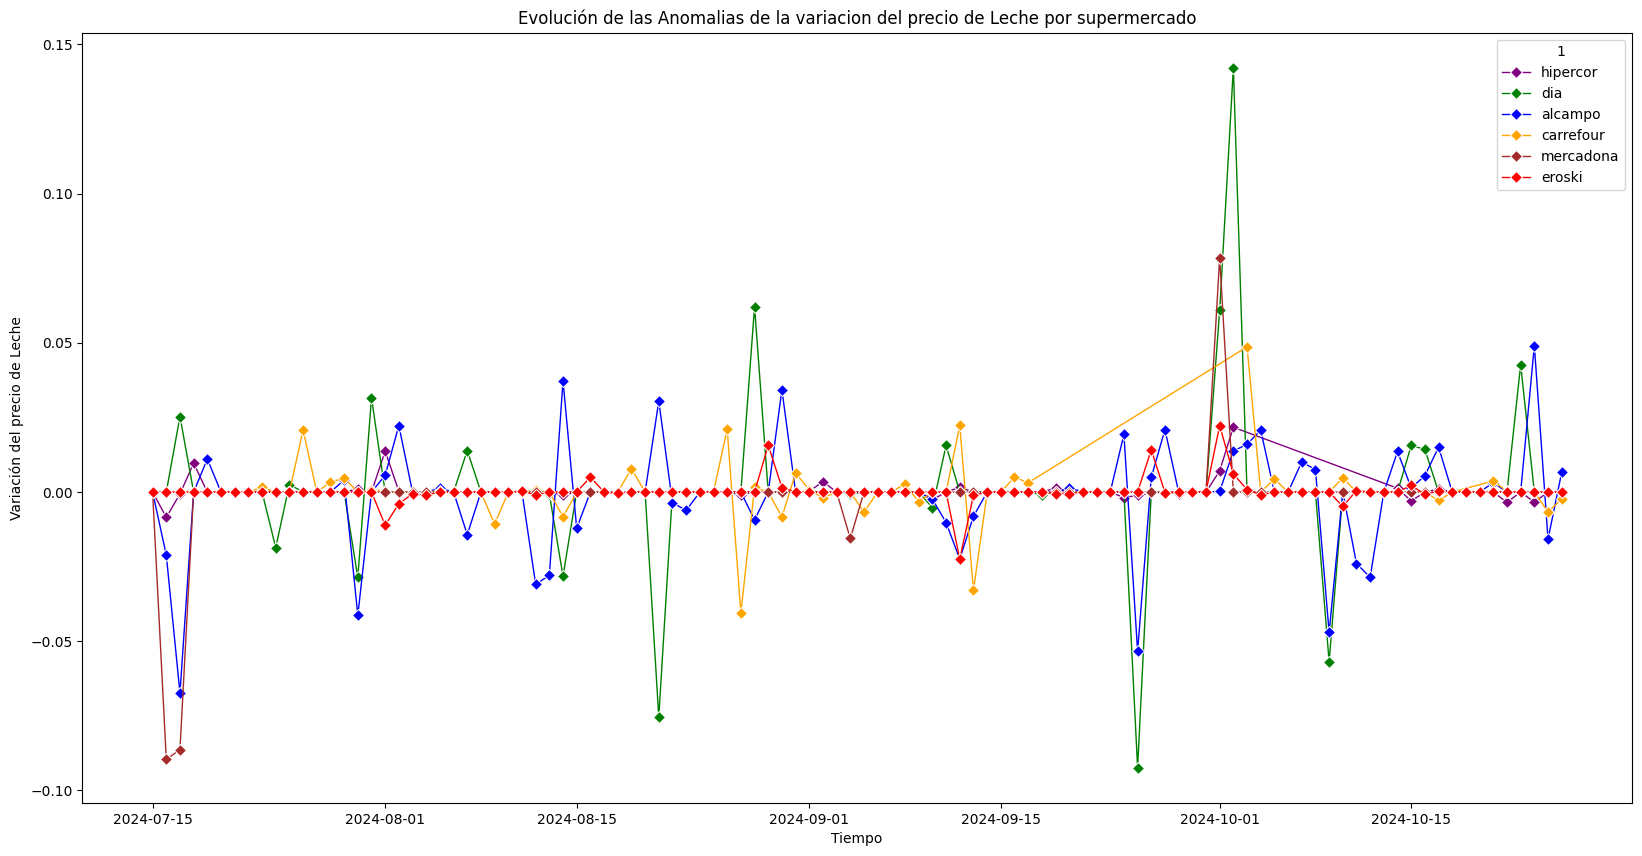

In [26]:
f.grafica_anomalias(0,3,1,df_anomalias_variacion_leche,"Leche")

In [27]:
cursor=conexion.cursor()
query_anomalias_variacion_oliva="""
SELECT fecha, super, p2.producto, AVG(p.variacion)  
FROM mercados m 
INNER JOIN principal p ON m.id_super = p.id_super
INNER JOIN productos p2 ON p.id_producto = p2.id_producto 
WHERE p2.producto = 'aceite-de-oliva'
GROUP BY fecha, super, p2.producto; 
"""
cursor.execute(query_anomalias_variacion_oliva)
df_anomalias_variacion_oliva= pd.DataFrame(cursor.fetchall())


In [28]:
df_anomalias_variacion_oliva[0] = pd.to_datetime(df_anomalias_variacion_oliva[0])

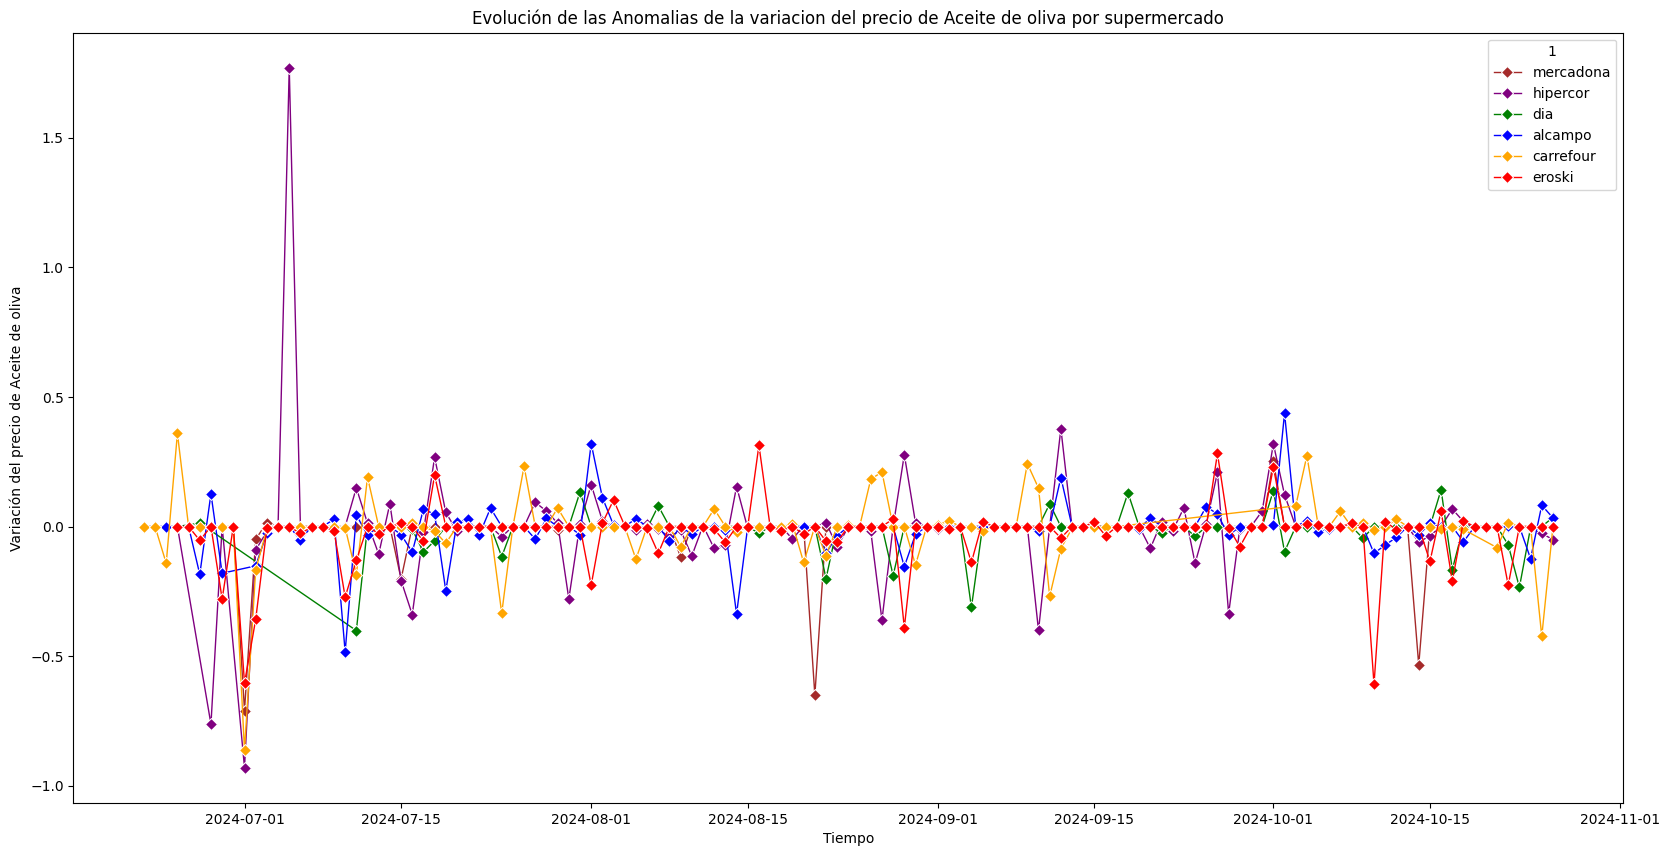

In [29]:
f.grafica_anomalias(0,3,1,df_anomalias_variacion_oliva,"Aceite de oliva")

In [30]:
cursor=conexion.cursor()
query_anomalias_variacion_girasol="""
SELECT fecha, super, p2.producto, AVG(p.variacion)  
FROM mercados m 
INNER JOIN principal p ON m.id_super = p.id_super
INNER JOIN productos p2 ON p.id_producto = p2.id_producto 
WHERE p2.producto = 'aceite-de-girasol'
GROUP BY fecha, super, p2.producto; 
"""
cursor.execute(query_anomalias_variacion_girasol)
df_anomalias_variacion_girasol= pd.DataFrame(cursor.fetchall())


In [31]:
df_anomalias_variacion_girasol[0] = pd.to_datetime(df_anomalias_variacion_girasol[0])

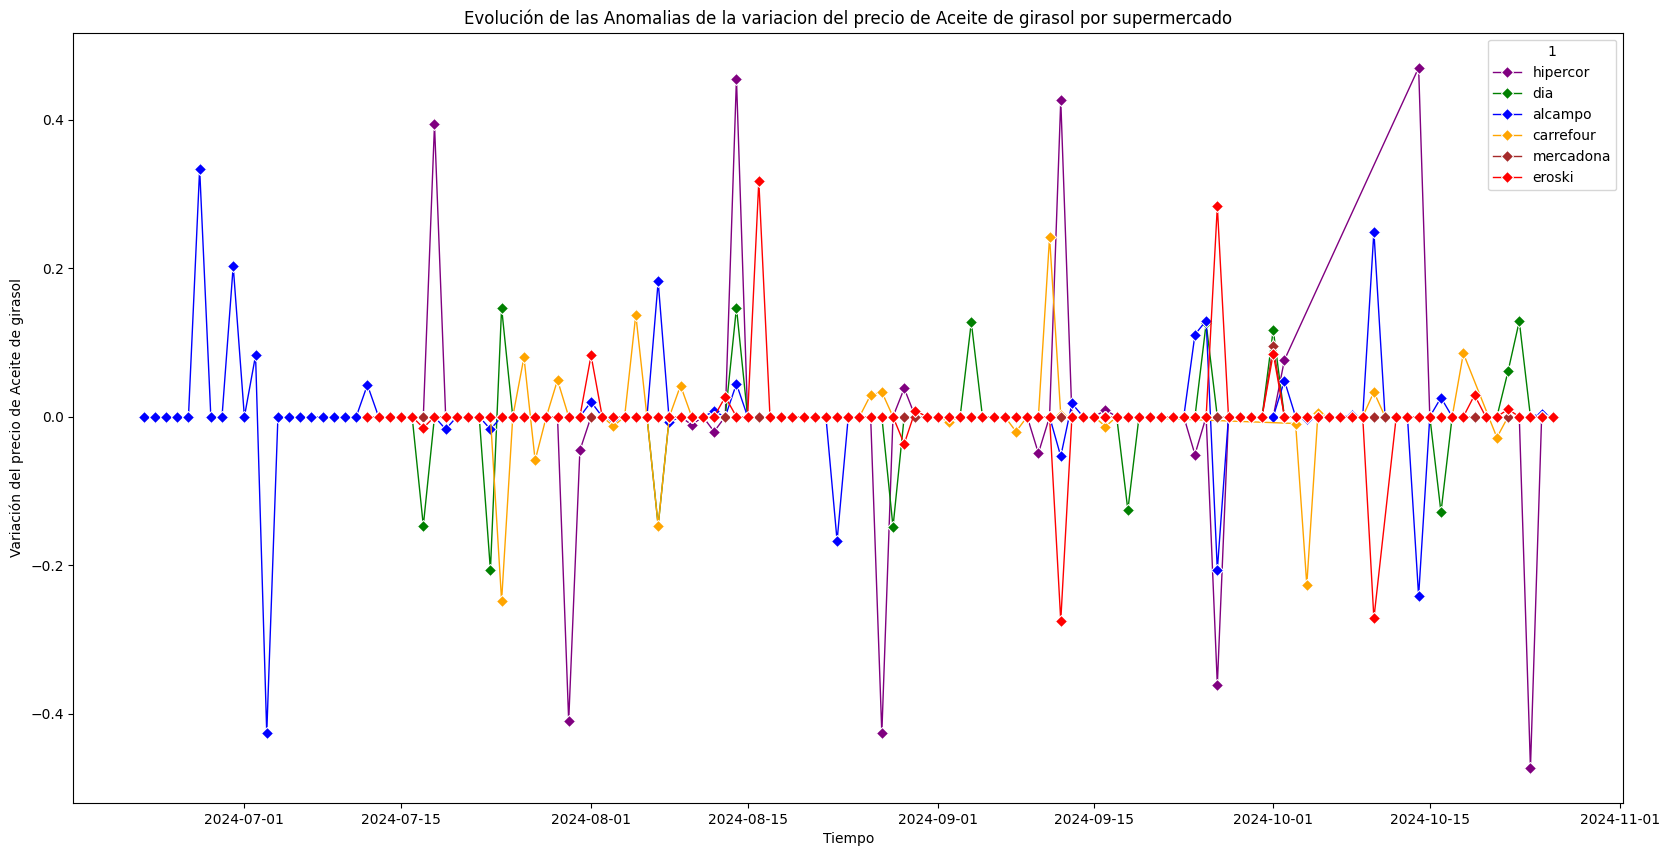

In [32]:
f.grafica_anomalias(0,3,1,df_anomalias_variacion_girasol,"Aceite de girasol")

COMPARACION MAXIMO Y MINIMO EN LOS SUPERS POR PRODUCTO HISTORICO

In [33]:
cursor=conexion.cursor()
query_comparacion_max_min_lechehist="""
SELECT m.super ,p2.producto, p.precio
FROM mercados m
INNER JOIN principal p ON m.id_super = p.id_super
INNER JOIN productos p2 ON p.id_producto = p2.id_producto 
WHERE p2.producto = 'leche' ;
"""
cursor.execute(query_comparacion_max_min_lechehist)
df_comparacion_max_min_lechehist= pd.DataFrame(cursor.fetchall())

In [34]:
df_comparacion_max_min_lechehist.head()

,0,1,2
0,carrefour,leche,0.78
1,carrefour,leche,0.78
2,carrefour,leche,15.29
3,carrefour,leche,2.85
4,carrefour,leche,3.99


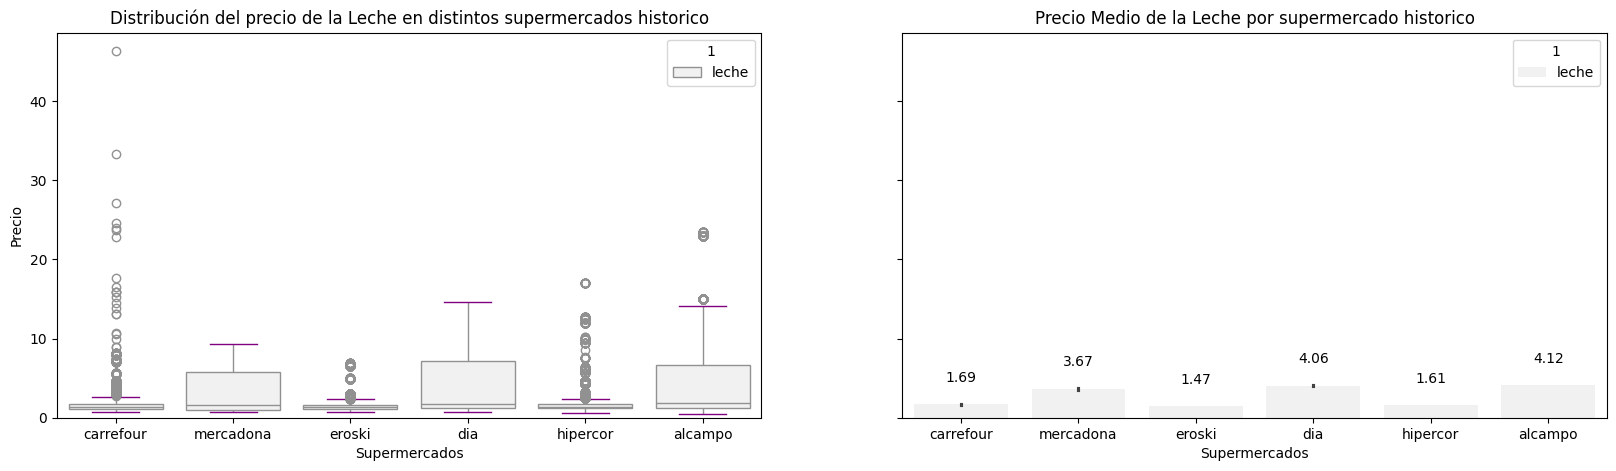

In [35]:
f.datos_grafico_comparacion_max_minhist(0,2,1,df_comparacion_max_min_lechehist,"light:blue","Leche",14)

In [36]:
cursor=conexion.cursor()
query_comparacion_max_min_olivahist="""
SELECT m.super ,p2.producto, p.precio
FROM mercados m
INNER JOIN principal p ON m.id_super = p.id_super
INNER JOIN productos p2 ON p.id_producto = p2.id_producto 
WHERE p2.producto = 'aceite-de-oliva' ;
"""
cursor.execute(query_comparacion_max_min_olivahist)
df_comparacion_max_min_olivahist= pd.DataFrame(cursor.fetchall())

In [37]:
df_comparacion_max_min_olivahist.head()

,0,1,2
0,carrefour,aceite-de-oliva,9.29
1,carrefour,aceite-de-oliva,10.49
2,carrefour,aceite-de-oliva,10.49
3,carrefour,aceite-de-oliva,9.29
4,carrefour,aceite-de-oliva,9.29


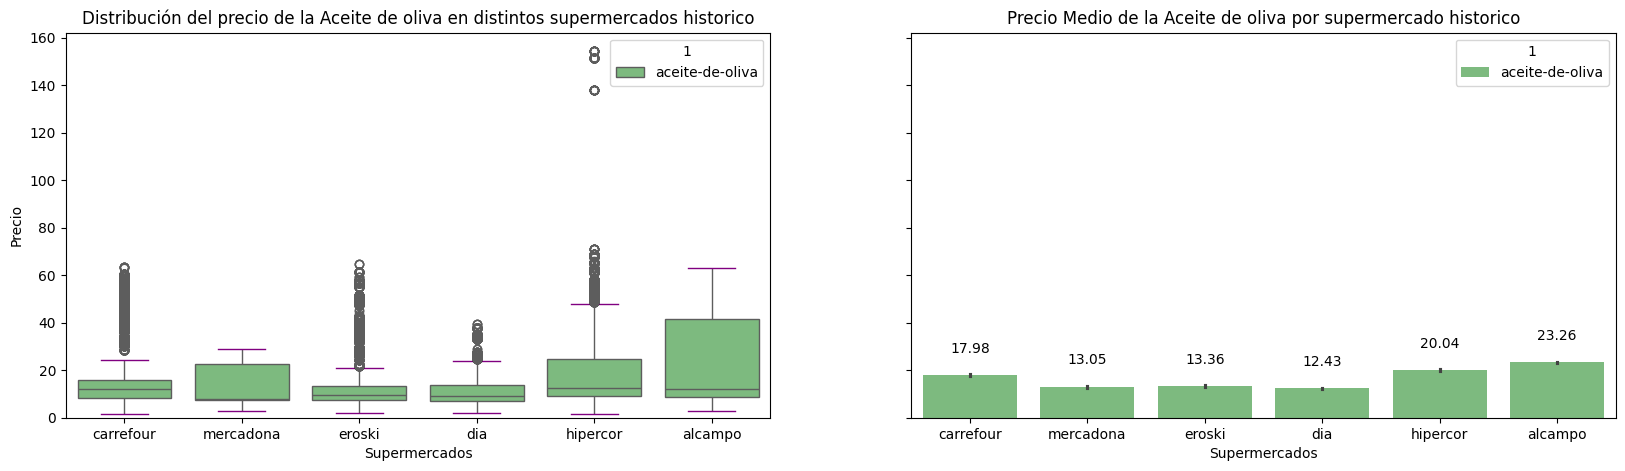

In [38]:
f.datos_grafico_comparacion_max_minhist(0,2,1,df_comparacion_max_min_olivahist,"Greens","Aceite de oliva",14)

In [39]:
cursor=conexion.cursor()
query_comparacion_max_min_girasolhist="""
SELECT m.super ,p2.producto, p.precio
FROM mercados m
INNER JOIN principal p ON m.id_super = p.id_super
INNER JOIN productos p2 ON p.id_producto = p2.id_producto 
WHERE p2.producto = 'aceite-de-girasol' ;
"""
cursor.execute(query_comparacion_max_min_girasolhist)
df_comparacion_max_min_girasolhist= pd.DataFrame(cursor.fetchall())

In [40]:
df_comparacion_max_min_girasolhist.head()

,0,1,2
0,carrefour,aceite-de-girasol,21.4
1,carrefour,aceite-de-girasol,21.4
2,carrefour,aceite-de-girasol,21.4
3,carrefour,aceite-de-girasol,21.4
4,carrefour,aceite-de-girasol,21.4


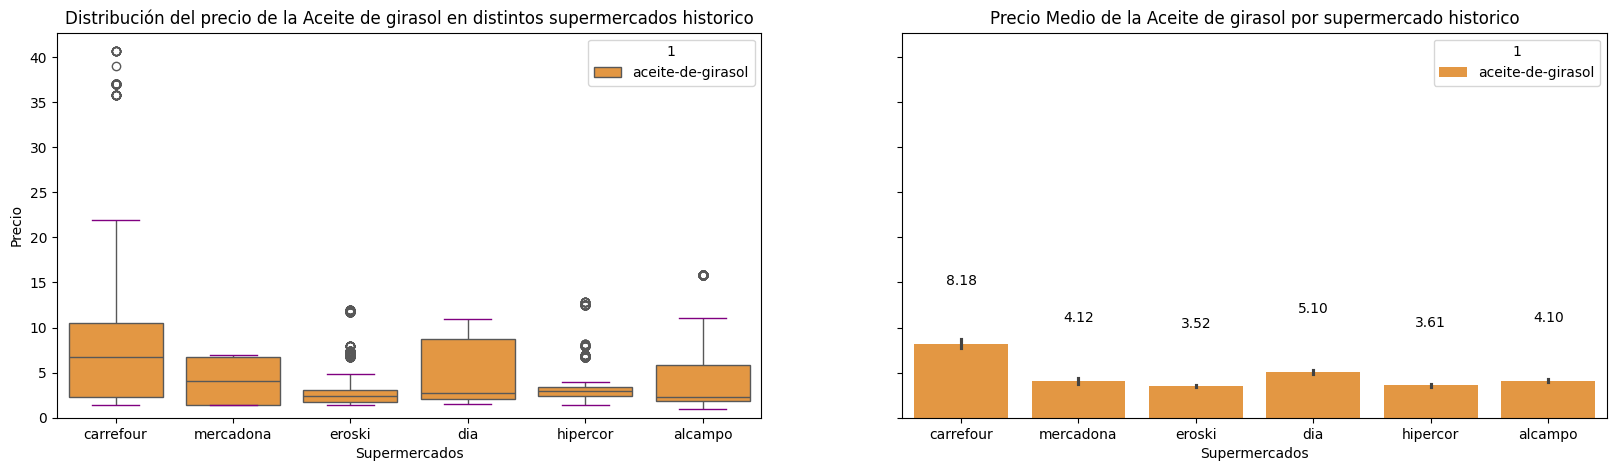

In [41]:
f.datos_grafico_comparacion_max_minhist(0,2,1,df_comparacion_max_min_girasolhist,"YlOrBr","Aceite de girasol",40)

PRUEBA EVOLUCION PRECIOS MEDIOS (TIENE SENTIDO LA MEDIA CON LA LIMITACION DE QUE DISOCIA DE LA MEDIANA)

In [42]:
cursor=conexion.cursor()
query_evol_precio_medio_leche="""
SELECT fecha, super, p2.producto, AVG(p.precio)  
FROM mercados m 
INNER JOIN principal p ON m.id_super = p.id_super
INNER JOIN productos p2 ON p.id_producto = p2.id_producto 
WHERE p2.producto = 'leche'
GROUP BY fecha, super, p2.producto; 
"""
cursor.execute(query_evol_precio_medio_leche)
df_evol_precio_medio_leche= pd.DataFrame(cursor.fetchall())

In [43]:
df_evol_precio_medio_leche[0] = pd.to_datetime(df_evol_precio_medio_leche[0])

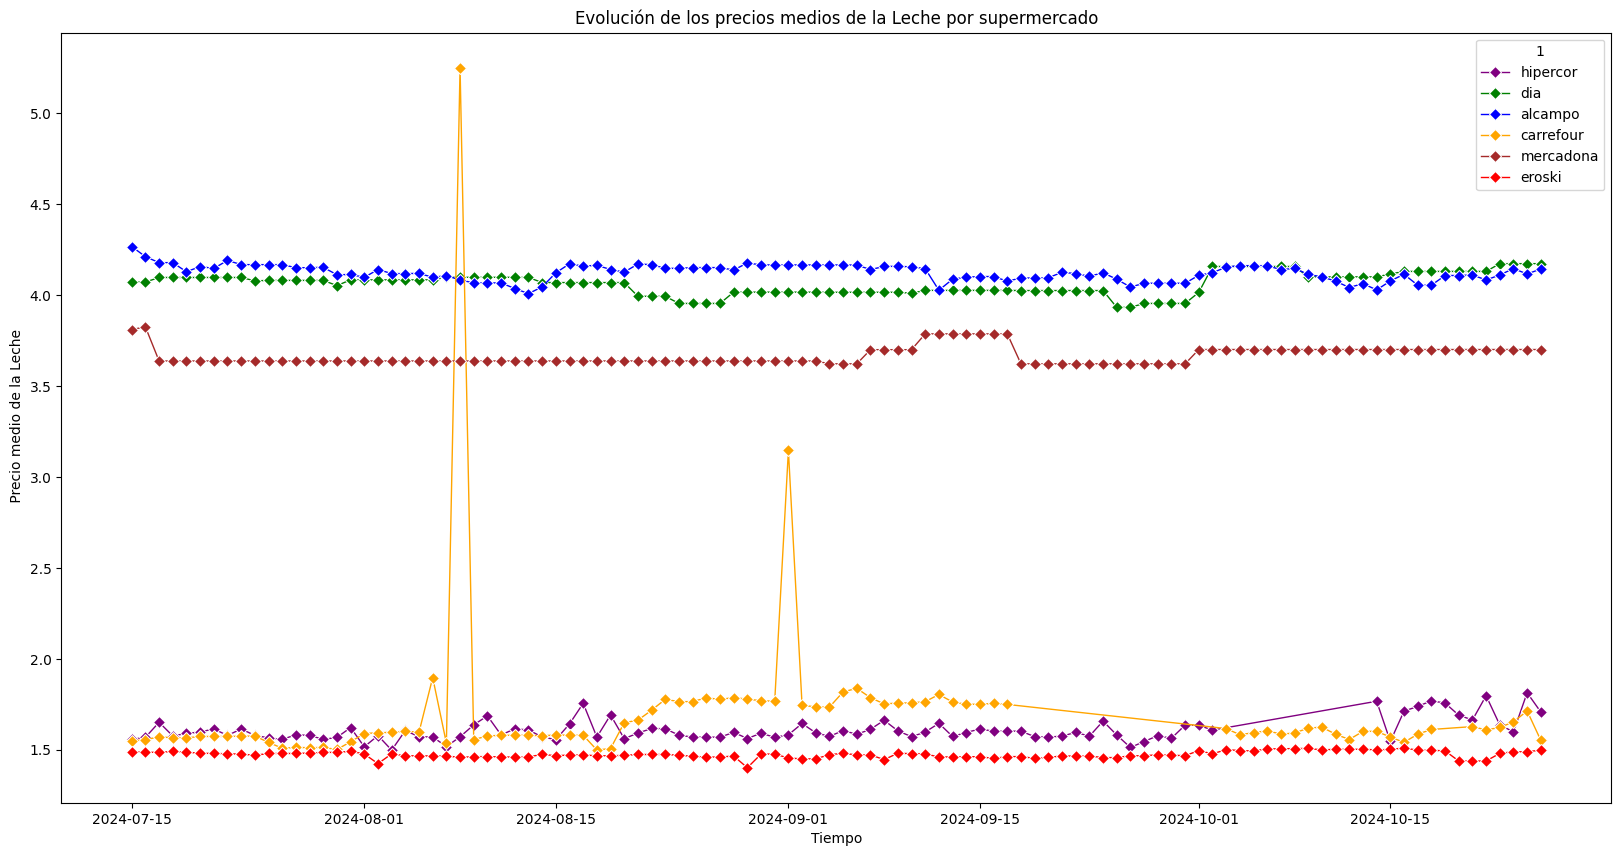

In [44]:
f.grafico_evol_precio_medio(0,3,1,df_evol_precio_medio_leche,"Leche")

In [45]:
cursor=conexion.cursor()
query_evol_precio_medio_oliva="""
SELECT fecha, super, p2.producto, AVG(p.precio)  
FROM mercados m 
INNER JOIN principal p ON m.id_super = p.id_super
INNER JOIN productos p2 ON p.id_producto = p2.id_producto 
WHERE p2.producto = 'aceite-de-oliva'
GROUP BY fecha, super, p2.producto; 
"""
cursor.execute(query_evol_precio_medio_oliva)
df_evol_precio_medio_oliva= pd.DataFrame(cursor.fetchall())

In [46]:
df_evol_precio_medio_oliva[0] = pd.to_datetime(df_evol_precio_medio_oliva[0])

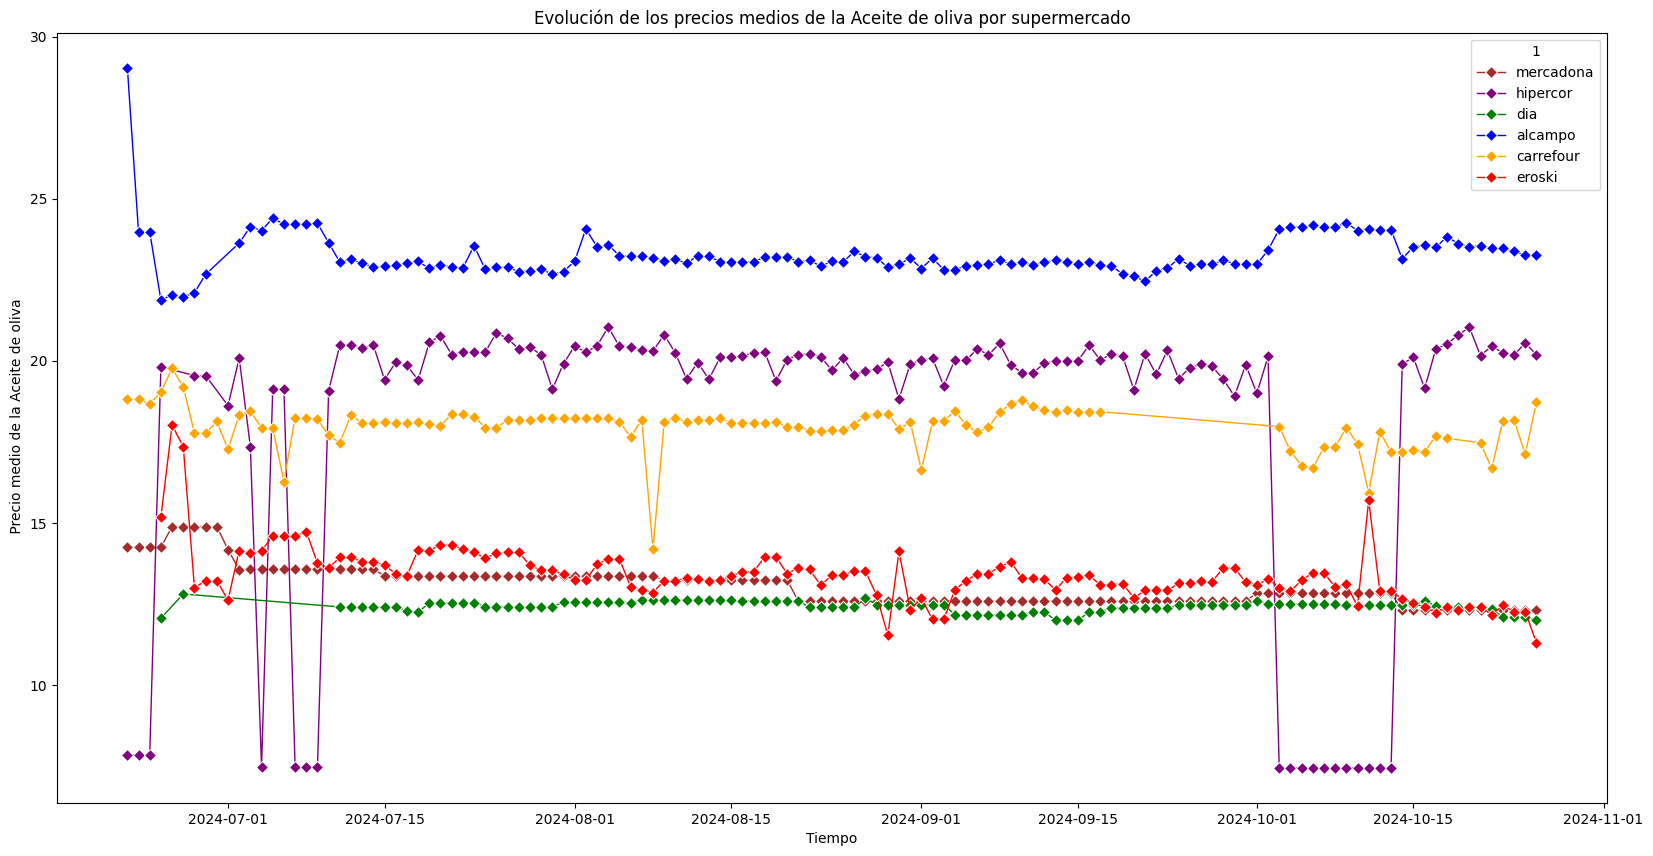

In [47]:
f.grafico_evol_precio_medio(0,3,1,df_evol_precio_medio_oliva,"Aceite de oliva")

In [48]:
cursor=conexion.cursor()
query_evol_precio_medio_girasol="""
SELECT fecha, super, p2.producto, AVG(p.precio)  
FROM mercados m 
INNER JOIN principal p ON m.id_super = p.id_super
INNER JOIN productos p2 ON p.id_producto = p2.id_producto 
WHERE p2.producto = 'aceite-de-girasol'
GROUP BY fecha, super, p2.producto; 
"""
cursor.execute(query_evol_precio_medio_girasol)
df_evol_precio_medio_girasol= pd.DataFrame(cursor.fetchall())

In [49]:
df_evol_precio_medio_girasol[0] = pd.to_datetime(df_evol_precio_medio_girasol[0])

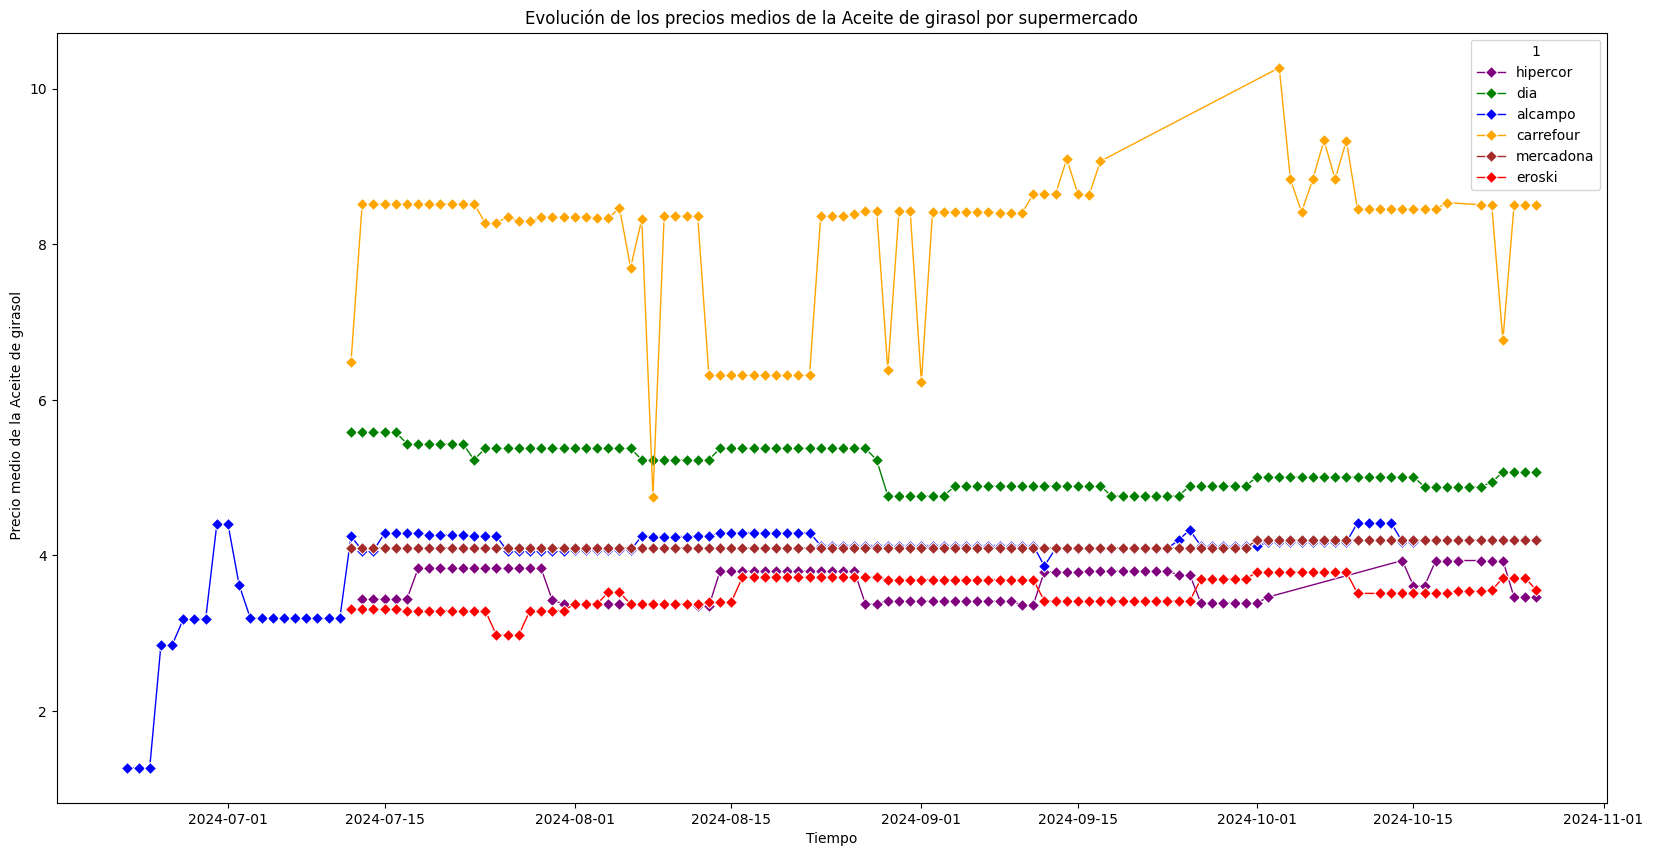

In [50]:
f.grafico_evol_precio_medio(0,3,1,df_evol_precio_medio_girasol,"Aceite de girasol")

**CONCLUSIONES:**   

***A FECHA DE HOY:***  


*Precio "medio" por supermercado(evaluado con mediana debido a la distorsión de la media por valores atípicos)*

*Leche:*  
- Precio medio más bajo: HIPERCOR con 1,40€.  
- Precio mdio más alto: ALCAMPO con 1,90€.

Supermercados con la Leche más barata(MAX,MIN y Evolución del precio medio):  

- EROSKI, HIPERCOR y CARREFOUR  


*Aceite de Oliva:* 
- Precio medio más bajo: DIA con apenas 10€.   
- Precio medio más alto: CARREFOUR e HIPERCOR  con 12,30€.  

Supermercados con EL Aceite de Oliva más barato(MAX,MIN y Evolución del precio medio):  

- DIA, EROSKI y MERCADONA  


*Aceite de Girasol:* 
- Precio medio más bajo: HIPERCOR e EROSKI con apenas 2,80€.   
- Precio medio más alto: CARREFOUR con casi 7€.  

Supermercados con EL Aceite de Girasol más barato(MAX,MIN):  

- HIPERCOR y EROSKI 
  
  
***HISTÓRICO:***   

*Leche:*   

- Precio medio más bajo: HIPERCOR con 1,45€.  
- Precio mdio más alto: ALCAMPO con 1,70€.

Supermercados con la Leche más barata(MAX,MIN):  

- HIPERCOR, EROSKI y CARREFOUR  


*Aceite de Oliva:* 
- Precio medio más bajo: MERCADONA con apenas 7€.   
- Precio medio más alto: ALCAMPO e HIPERCOR  con 12,43€ aproximadamente.  

Supermercados con EL Aceite de Oliva más barato(MAX,MIN):  

- EROSKI, DIA y CARREFOUR  


*Aceite de Girasol:* 
- Precio medio más bajo: EROSKI con apenas 3€.   
- Precio medio más alto: CARREFOUR con casi 7€.  

Supermercados con EL Aceite de Girasol más barato(MAX,MIN):  

- HIPERCOR y EROSKI  
  

    


**ANÁLISIS VARIACIONES DE PRECIOS**  


*Leche:*   
Por lo general las variaciones de la leche han sido negativas en todos los supermercados. El precio de la leche se mantuvo bastante estable por lo general exceptuando una gran bajada generalizada de hasta casi 6 céntimos menos (MERCADONA) a excepción de DIA que subio su precio casi 1 céntimo.  


*Aceite de Oliva:* 
Al igual que la leche se observa al inicio del período (y durante el resto del períododo) una variación negativa en el precio del aceite de oliva lo que puede tener sentido ya que tras la subida de precios galopante de los alimentos, tiene sentido que venga un período de  bajada.  
La mayor bajada del precio medio del aceite fue por parte de HIPERCOR(casi 40 céntimos menos).  



*Aceite de Girasol:* 
Las variaciones del precio del girasol contrariamente a los otros dos productos, cuenta con variaciones positivas lo que puede tener sentido debido al encarecimiento de los últimos meses del aceite de oliva, el aceite de girasol es un sustitutivo directo haciendo que el precio de éste se encarezca.  
La mayor variación fue de ALCAMPO e HIPERCOR (Con 10 centimos y casi 7 respectivamente)
A pesar de todo, a lo largo del período se estabiliza el precio según el verano va llegando a su fin.

**EN DEFINITIVA:**

Los supermercados más estables (Con menor número de anomalías detectadas en los precios de sus productos) son EROSKI y MERCADONA mientras que los que más anomalías presentan son ALCAMPO y CARREFOUR.  
  
Además, el producto con mayor variabilidad de precios es el Aceite de Oliva seguido por el Aceite de Girasol.

Finalmente, no se observan grandes diferencias en las posiciones de los precios entre el análisis histórico y el análisis a fecha del 26/10/2024 de done se obtiene que:

Supermercados con la Leche más barata:    

- EROSKI, HIPERCOR y CARREFOUR   

Supermercados con EL Aceite de Oliva más barato:    

- DIA, EROSKI y MERCADONA  

Supermercados con EL Aceite de Girasol:    

- HIPERCOR y EROSKI (Donde podemos apreciar lo que parece ser un patrón de competencia en precios entre ellos)